In [1]:
###############################################################################
#                          1. Importing Libraries                             #
###############################################################################
# To make maps
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.lines import Line2D

# To add text and a border to the map
from PIL import Image, ImageOps, ImageColor, ImageFont, ImageDraw
import PIL

In [2]:
###############################################################################
#                              2. Version Check                              #
###############################################################################
print(f"The NetworkX package is version {nx.__version__}")
print(f"The OSMNX package is version {ox.__version__}")
print(f"The Request package is version {requests.__version__}")
print(f"The PIL package is version {PIL.__version__}")

The NetworkX package is version 2.4
The OSMNX package is version 0.12
The Request package is version 2.23.0
The PIL package is version 7.0.0


In [3]:
###############################################################################
#                                3. Get Data                                  #
###############################################################################
# Define city/cities
places = [
    "Bonita, California, USA",
    "Carlsbad, California, USA",
    "Chula Vista, California, USA",
    "Coronado, California, USA",
    "Del Mar, California, USA",
    "El Cajon, California, USA",
    "Encinitas, California, USA",
    "Escondido, California, USA",
    "Imperial Beach, California, USA",
    "La Mesa, California, USA",
    "Lemon Grove, California, USA",
    "National City, California, USA",
    "Oceanside, California, USA",
    "Poway, California, USA",
    "San Diego, California, USA",
    "San Marcos, California, USA",
    "Santee, California, USA",
    "Solana Beach, California, USA",
    "Vista, California, USA",
]

# Get data for places
G = ox.graph_from_place(places, network_type = "drive", simplify = True)

In [4]:
###############################################################################
#                               4. Unpack Data                                #
###############################################################################
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in G.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)

In [5]:
###############################################################################
#                5. Assign Each Segment a Color Based on its Length           #
###############################################################################
# List to store colors
roadColors = []

# The length is in meters
for item in data:
    if "length" in item.keys():
        
        if item["length"] <= 100:
            color = "#aba6a2"
            
        elif item["length"] <= 200:
            color = "#807c78"
            
        elif item["length"] <= 400:
            color = "#555351"
            
        elif item["length"] <= 800:
            color = "#2b2928"
            
        else:
            color = "#000000"
             
    roadColors.append(color)

In [6]:
###############################################################################
#                6. Assign Each Segment a Width Based on its type             #
###############################################################################
# List to store linewidths
roadWidths = []

for item in data:
    if "footway" in item["highway"]:
        linewidth = 1

    else:
        linewidth = 1.5
        
    roadWidths.append(linewidth)

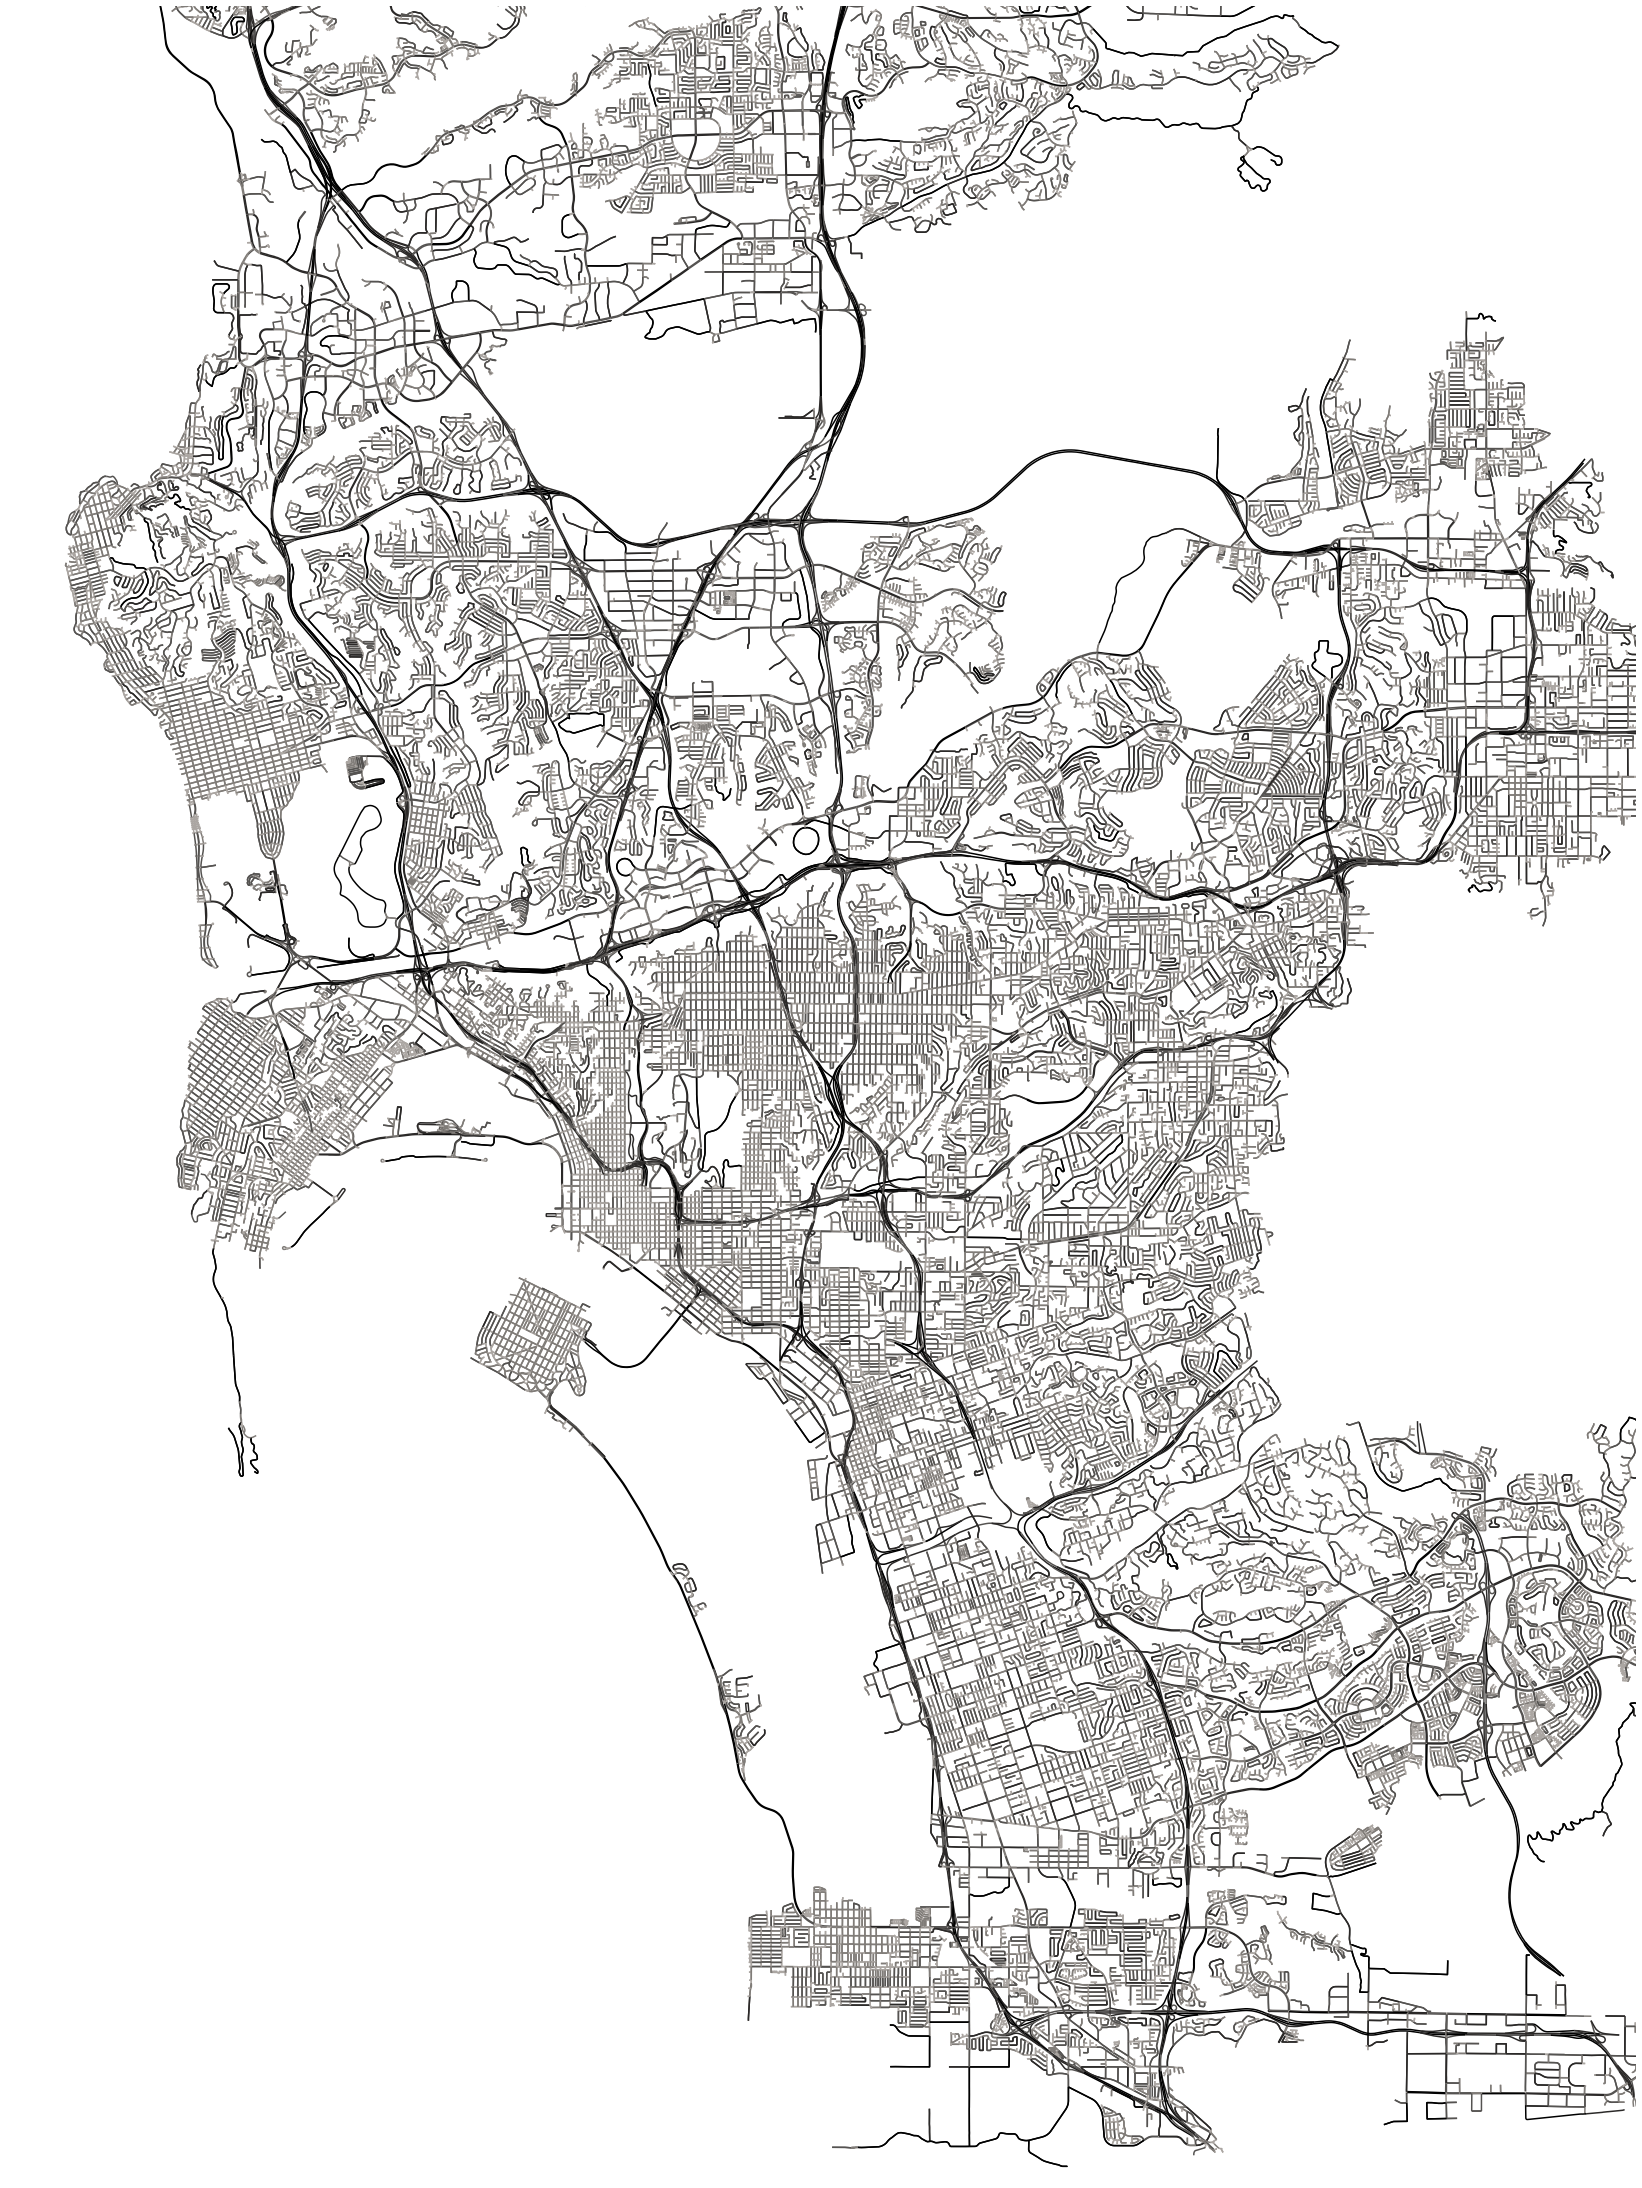

In [7]:
###############################################################################
#                                 7. Make Map                                 #
###############################################################################
# Center of map
latitude = 32.717303
longitude = -117.221403

# Bbox sides
north = latitude + 0.219
south = latitude - 0.18
east = longitude + 0.283
west = longitude - 0.073

# Make Map
fig, ax = ox.plot_graph(G, node_size=0, bbox = (north, south, east, west), margin = 0,
                        fig_height=40, fig_width=40, dpi = 300,  bgcolor = "#ffffff",
                        save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)


# Text and marker size
markersize = 16
fontsize = 16

'''
# Add legend
legend_elements = [Line2D([0], [0], marker='s', color="#061529", label= 'Length < 100 m',
                          markerfacecolor="#d40a47", markersize=markersize),
                          
                  Line2D([0], [0], marker='s', color="#061529", label= 'Length between 100-200 m',
                         markerfacecolor="#e78119", markersize=markersize),
                  
                  Line2D([0], [0], marker='s', color="#061529", label= 'Length between 200-400 m',
                         markerfacecolor="#30bab0", markersize=markersize),
                  
                  Line2D([0], [0], marker='s', color="#061529", label= 'Length between 400-800 m',
                         markerfacecolor="#bbbbbb", markersize=markersize),
                  
                  Line2D([0], [0], marker='s', color="#061529", label= 'Length > 800 m',
                  markerfacecolor="w", markersize=markersize)]    
                      
l = ax.legend(handles=legend_elements, bbox_to_anchor=(0.0, 0.0), frameon=True, ncol=1,
              facecolor = '#061529', framealpha = 0.9,
              loc='lower left',  fontsize = fontsize, prop={'family':"Georgia", 'size':fontsize})  
  
# Legend font color
for text in l.get_texts():
    text.set_color("b")
'''
 
# Save figure
fig.savefig("SanDiego.pdf", bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=True)
fig.savefig("SanDiego.png", bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=True)